In [1]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, Mp3Compression
import numpy as np
from scripts.utils import get_wavs_in_dir
from essentia.standard import MonoLoader, MonoWriter
import matplotlib.pyplot as plt
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

fs = 44100
folder = 'data/slices/IDMT'
file_list = get_wavs_in_dir(folder)
file_list = file_list[:10]

In [2]:
augment = Compose([
    AddGaussianNoise(min_amplitude=0.01, max_amplitude=0.05, p=0.7),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-2, max_semitones=2, p=0.5),
    Shift(min_fraction=0, max_fraction=0.25, p=0.5),
    Mp3Compression(p = 0.5)
])

10 files to augment
0 files augmented


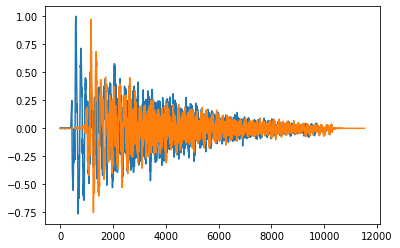

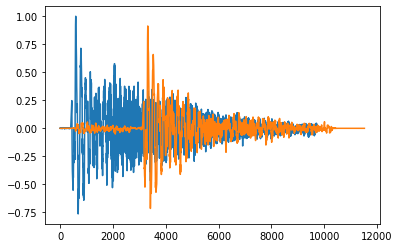

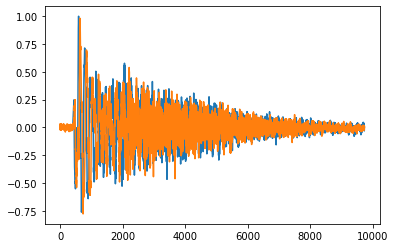

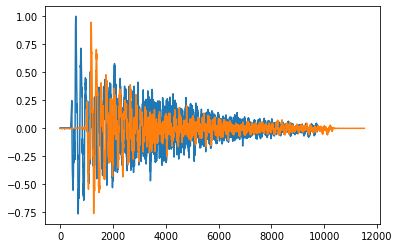

In [3]:
N_augmentations = 10
print("{} files to augment".format(len(file_list)))
for i, filename in enumerate(file_list):
    x = MonoLoader(filename = filename, sampleRate = fs)()
    for n_aug in range(N_augmentations):
        augment(samples=x, sample_rate=fs)
        new_name = filename.split('/')[-1].split('.')[0] + 'aug' + str(i * N_augmentations + n_aug)+ '.wav'
        MonoWriter(filename= folder + '/augmented_data/' + new_name )(augment(samples=x, sample_rate=fs))
        
    if i%100 == 0:
        print("{} files augmented".format(i))
        

plt.plot(x)
plt.plot(augment(samples=x, sample_rate=fs))
plt.show()
plt.plot(x)
plt.plot(augment(samples=x, sample_rate=fs))
plt.show()
plt.plot(x)
plt.plot(augment(samples=x, sample_rate=fs))
plt.show()
plt.plot(x)
plt.plot(augment(samples=x, sample_rate=fs))
plt.show()